In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

In [44]:
data = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv')
data.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [45]:
data.columns = data.columns.str.lower().str.replace(' ', '_')

In [46]:
df = data[['ram', 'storage', 'screen', 'final_price']]
df.head()

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


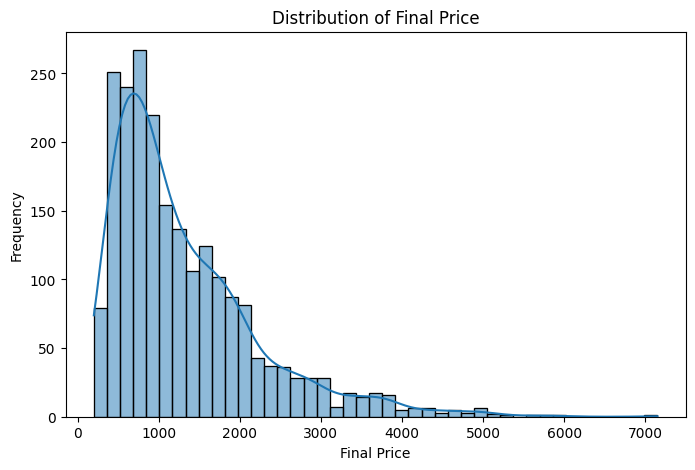

In [47]:
plt.figure(figsize=(8, 5))
sns.histplot(df['final_price'], kde=True)
plt.title('Distribution of Final Price')
plt.xlabel('Final Price')
plt.ylabel('Frequency')
plt.show()

In [48]:
median_ram = df['ram'].median()
print(f'The median value for ram is: {median_ram}')

The median value for ram is: 16.0


In [49]:
missing_values = df.isnull().sum()
print(missing_values)

ram            0
storage        0
screen         4
final_price    0
dtype: int64


In [59]:
def fill_nan_values(df,value):
    df['screen'] = df['screen'].fillna(value)
    df.isnull().sum()

    return df

In [60]:
df = fill_nan_values(df,0)

/tmp/ipykernel_3013/1445245981.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['screen'] = df['screen'].fillna(value)


Shufflle, Split data in train/val/tests sets

In [61]:
n = len(df)
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test

In [62]:
index = np.arange(n)

In [63]:
np.random.shuffle(index)

In [64]:
df_train = df.iloc[index[n_train:]]
df_val = df.iloc[index[n_train:n_train + n_val]]
df_test = df.iloc[index[n_train + n_val:]]

In [65]:
df_train = df_train.reset_index(drop =True)
df_val = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [66]:
y_train = np.log1p(df_train.final_price.values)
y_val = np.log1p(df_val.final_price.values)
y_test = np.log1p(df_test.final_price.values)


In [67]:
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']



Train Linear Regression Model

In [68]:
X_train = df_train[['ram','storage','screen']].values
X_val = df_val[['ram','storage','screen']].values
X_test = df_test[['ram','storage','screen']].values

In [69]:
y_train

array([7.54430036, 6.55108034, 7.60090246, 7.60110244, 5.89943149,
       6.83856596, 7.41456686, 7.12220515, 7.5857939 , 7.25841215,
       7.05946298, 6.95748786, 6.74523635, 6.92854761, 7.13322412,
       7.54961443, 7.69621264, 6.38012254, 6.36337287, 6.83085264,
       6.67651655, 7.70957299, 7.14479385, 7.77904864, 6.42032061,
       7.19645433, 6.1737861 , 6.55108034, 7.70074779, 6.10924758,
       6.81656062, 6.55108034, 6.40522846, 7.17088848, 7.7406644 ,
       7.54961443, 6.55108034, 6.62007321, 6.22655643, 7.46737107,
       7.88248094, 6.71736929, 6.68911408, 6.68586095, 8.1019777 ,
       8.51719319, 6.73831836, 6.52914143, 7.53369371, 7.42596557,
       6.77376664, 7.54960917, 5.98401184, 5.99393649, 7.04998374,
       5.84643878, 7.36760756, 6.88755257, 7.82404601, 7.17011954,
       6.07133801, 7.54960917, 6.99933122, 7.53851629, 5.99148955,
       6.14474342, 8.03915739, 6.79794041, 7.63083013, 7.45654121,
       5.80739146, 6.62139234, 5.83123711, 6.3442143 , 6.39692

In [70]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:] 

w0,w = train_linear_regression(X_train, y_train)

In [71]:
y_pred = w0 + X_train.dot(w)

In [72]:
def rmse(y_pred,y):
    err = y - y_pred
    se_err = err ** 2
    mse = se_err.mean()
    return np.sqrt(mse)

Validating the model

In [73]:
w0,w = train_linear_regression(X_train,y_train)
y_pred = w0 + X_val.dot(w)

rmse(y_val,y_pred)

np.float64(0.42904100809581874)

fill nan values with mean

In [74]:
data = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv')
data.columns = data.columns.str.lower().str.replace(' ', '_')
df = data[['ram', 'storage', 'screen', 'final_price']]
df.head()

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


In [75]:
missing_values = df.isnull().sum()
print(missing_values)

ram            0
storage        0
screen         4
final_price    0
dtype: int64


In [76]:
df['screen'] = df['screen'].fillna(data['screen'].mean())
df.isnull().sum()

/tmp/ipykernel_3013/3108068523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['screen'] = df['screen'].fillna(data['screen'].mean())


ram            0
storage        0
screen         0
final_price    0
dtype: int64

In [77]:
df_train = df.iloc[index[n_train:]]
df_val = df.iloc[index[n_train:n_train + n_val]]
df_test = df.iloc[index[n_train + n_val:]]

In [78]:
df_train = df_train.reset_index(drop =True)
df_val = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [79]:
y_train = np.log1p(df_train.final_price.values)
y_val = np.log1p(df_val.final_price.values)
y_test = np.log1p(df_test.final_price.values)


In [80]:
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [81]:
X_train = df_train[['ram','storage','screen']].values
X_val = df_val[['ram','storage','screen']].values
X_test = df_test[['ram','storage','screen']].values

In [82]:
y_pred = w0 + X_train.dot(w)

In [83]:
w0,w = train_linear_regression(X_train,y_train)
y_pred = w0 + X_val.dot(w)

rmse(y_val,y_pred)

np.float64(0.42940370374567316)